## Introduction: Exploring nobel prize laureates

In this notebook we use a dataset over all Nobel prize laurates from it's start in 1901 until today. We will try to explore many perspectives through this dataset, using the exercises and challenges from DataCamp as a starting point. 

Please we aware that the main purpose of this notebook is for me to pracice my python and pandas skills, and thus you might find that not every aspect of the notebook is comunicated equally well. 

## Preliminaries

In [86]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

nobel = pd.read_csv("nobel.csv")
nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


## Exploring and cleaning the data set

In [87]:
print("Size of dataset (row, column): " + str(nobel.shape) + '\n')
print("Information about the columns: \n")

nobel.info()

Size of dataset (row, column): (1000, 18)

Information about the columns: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   year                  1000 non-null   int64 
 1   category              1000 non-null   object
 2   prize                 1000 non-null   object
 3   motivation            912 non-null    object
 4   prize_share           1000 non-null   object
 5   laureate_id           1000 non-null   int64 
 6   laureate_type         1000 non-null   object
 7   full_name             1000 non-null   object
 8   birth_date            968 non-null    object
 9   birth_city            964 non-null    object
 10  birth_country         969 non-null    object
 11  sex                   970 non-null    object
 12  organization_name     736 non-null    object
 13  organization_city     735 non-null    object
 14  organization_

In [88]:
print("\n NaN-values in each column: \n")
nobel.isna().sum()


 NaN-values in each column: 



year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               32
birth_city               36
birth_country            31
sex                      30
organization_name       264
organization_city       265
organization_country    265
death_date              404
death_city              421
death_country           415
dtype: int64

We see that we will need to handle some missing values before we proceed. Also note that there are some columns that probably should be converted to another dtype: 
- Columns related to dates should be converted to *datetime*.
- Columns only having some allowed values should be converte to *category*

We'll handle the NaN values first, adding placeholder values for missing dates and a string for other missing values. 

After that we will convert dtype of the columns. 

In [89]:
# Filling in the NaN-values, adding placeholder values for the missing dates
nobel["birth_date"] = nobel["birth_date"].fillna(str(dt.date.today())) 
nobel["death_date"] = nobel["death_date"].fillna(str(dt.date.today())) 
nobel = nobel.fillna("not given") 

In [90]:
# We want to convert the category and laureate_type column to category dtype
nobel["category"] = nobel["category"].astype('category')
nobel["laureate_type"] = nobel["laureate_type"].astype('category')
nobel["sex"] = nobel["sex"].astype('category')

In [91]:
# We want to convert the birth date and death date column to datetime:
nobel["birth_date"] = pd.to_datetime(nobel["birth_date"], errors='coerce', format='%Y-%m-%d')
nobel["death_date"] = pd.to_datetime(nobel["death_date"], errors='coerce', format='%Y-%m-%d')

# Handle NaT values that may have arisen during conversion (if some dates had an unsupported value/format)
today = dt.date.today()
nobel["birth_date"] = nobel["birth_date"].fillna(today) #placeholder values for missing dates
nobel["death_date"] = nobel["death_date"].fillna(today) #placeholder values for missing dates

nobel.isna().sum() #checking that we have no NaN values

year                    0
category                0
prize                   0
motivation              0
prize_share             0
laureate_id             0
laureate_type           0
full_name               0
birth_date              0
birth_city              0
birth_country           0
sex                     0
organization_name       0
organization_city       0
organization_country    0
death_date              0
death_city              0
death_country           0
dtype: int64

In [92]:
nobel.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30 00:00:00,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16 00:00:00,Paris,France,Male,not given,not given,not given,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15 00:00:00,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,not given,1/2,462,Individual,Jean Henry Dunant,1828-05-08 00:00:00,Geneva,Switzerland,Male,not given,not given,not given,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,not given,1/2,463,Individual,Frédéric Passy,1822-05-20 00:00:00,Paris,France,Male,not given,not given,not given,1912-06-12,Paris,France


## Number of Nobel prizes awarded per category

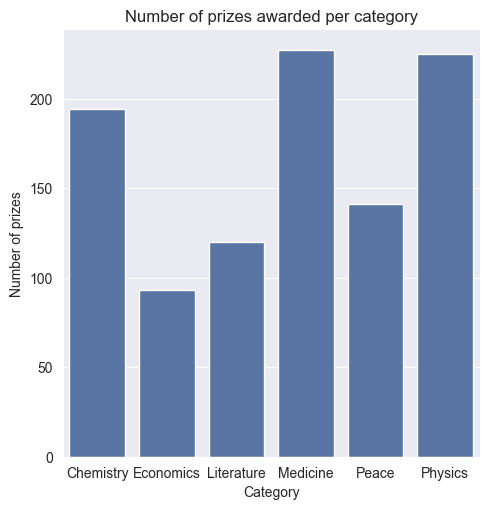

In [93]:
sns.set_palette("deep")

nobel_categories = nobel["category"].value_counts()
p5 = sns.catplot(kind="bar", data=nobel_categories)
p5.set(title="Number of prizes awarded per category", xlabel="Category", ylabel="Number of prizes")
plt.show()

We see that Medicine is the prize that has the most number of prizes awarded, and Economics has the least. 

## Top gender and country among laureates
We want to find the most commonly awarded gender and birth country amongst the laureats. 

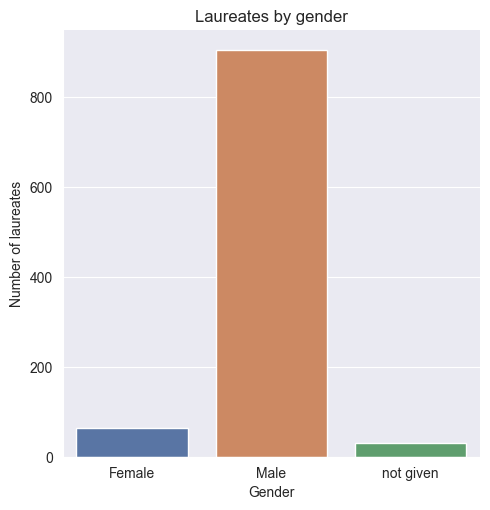

In [94]:
#Finding the top gender via visiualization: 
nobel['sex'].value_counts()
p4 = sns.catplot(data=nobel, x='sex', hue='sex', kind='count', palette="deep")
p4.set(title='Laureates by gender', ylabel="Number of laureates", xlabel="Gender")
top_gender = 'Male' #storing this variable is a datacamp requirement

In [95]:
#Finding top gender via computing: 
nobel_by_gender = nobel.groupby('sex', observed=False).count()
top_gender = nobel_by_gender['year'].idxmax()  #storing this variable is a datacamp requirement
print(top_gender + " is the most awarded gender.")

Male is the most awarded gender.


In [96]:
#We find the top country by computing only:
nobel_by_birthcountry = nobel.groupby('birth_country').count()
top_country = nobel_by_birthcountry['year'].idxmax() #storing this variable is a datacamp requirement
top_country

'United States of America'

## US laureates

We want to find which decade had the highest *ratio* of US-born Nobel Prize winners in all categories. 

In [97]:
#First we create a bin of decades. The Nobel prize did not exist prior to 1900 so we start there. 
decades_bin = [1899,1909,1919,1929,1939,1949,1959,1969,1979,1989,1999,2009,2019,2029]
decades_labels = ['1900','1910','1920','1930','1940','1950','1969','1970','1980','1990','2000','2010','2020']

#adding the decade column, based on the year column:
nobel.loc[:,'decade'] = pd.cut(x = nobel['year'], bins=decades_bin, labels=decades_labels)

#Subsetting the rows of laureates from USA:
nobel_us_laureate = nobel[ nobel["birth_country"] == "United States of America"]
nobel_us_laureate.sort_values(by=['year'], ascending=False)

#previewing the new dataframe to sanity check it looks as expected
nobel_us_laureate.head(2)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,decade
35,1906,Peace,The Nobel Peace Prize 1906,not given,1/1,470,Individual,Theodore Roosevelt,1858-10-27 00:00:00,"New York, NY",United States of America,Male,not given,not given,not given,1919-01-06,"Oyster Bay, NY",United States of America,1900
72,1912,Peace,The Nobel Peace Prize 1912,not given,1/1,480,Individual,Elihu Root,1845-02-15 00:00:00,"Clinton, NY",United States of America,Male,not given,not given,not given,1937-02-07,"New York, NY",United States of America,1910


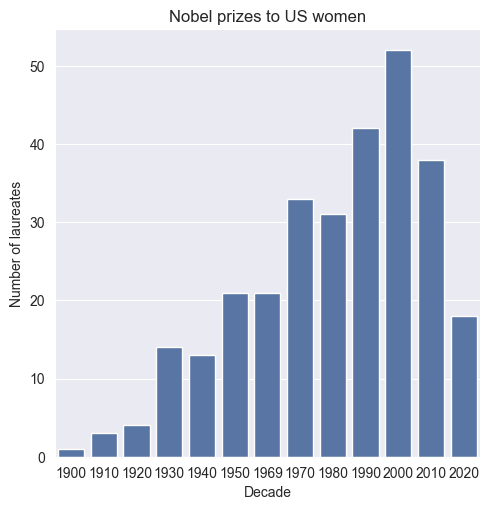

In [98]:
p3 = sns.catplot(kind='count', data = nobel_us_laureate, x='decade', legend=False)
p3.set(title="Nobel prizes to US women", xlabel="Decade", ylabel="Number of laureates")
plt.show()

In [99]:
max_decade_usa = '2000' #this variabel is a requirement from Datacamp

## Exploring the female laureates
In this section we want to explore the female ratio of laureates. First we ill find which decade had the higest female ration for each category. We will then move on to explore the female ratio for each decade (independent of category) and for each category. 

We will also find who was the first female winner of a Nobel prize. 

### The decade and category with the highest *ratio* of female laureates

In [100]:
## Highest ratio of female 
nobel_dec_cat_gen = nobel.groupby(['sex','decade', 'category'], observed=True).count() #Group by gender, decade and category, and count occurrences
nobel_dec_cat_gen = nobel_dec_cat_gen.loc['Female'] #separate out the rows with females

nobel_dec_cat = nobel.groupby(['decade', 'category'],observed=True).count() #Group by decade and category (not gender), and count occurences
nobel_dec_cat["female_ratio"] = nobel_dec_cat_gen['year'] / nobel_dec_cat['year'] #calculate female ratio per decade + category, and add to nobel_dec_cat

#Finding the max year and category:
max_female = nobel_dec_cat['female_ratio'].idxmax() #find the maximum
max_female_dict = {max_female[0]:max_female[1]} #this variable is a requirement from DataCamp
print("The decade and category with the all time highest female ratio of prize winners are " + str(max_female[0]) + ", " + str(max_female[1]) + " category.")

The decade and category with the all time highest female ratio of prize winners are 2020, Literature category.


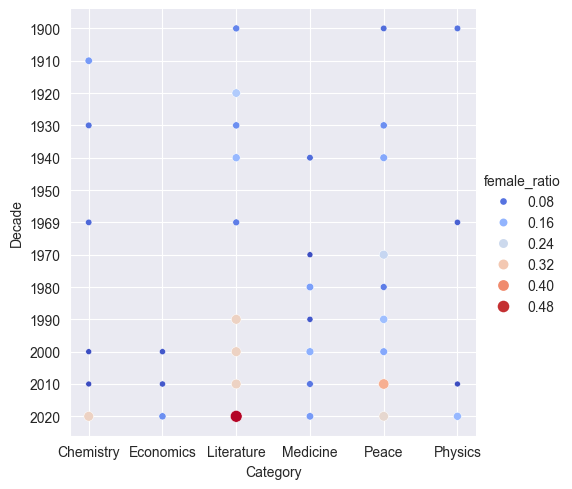

In [101]:
p1 = sns.relplot(kind='scatter', data=nobel_dec_cat, 
                 hue='female_ratio', 
                 x='category', 
                 y='decade', 
                 size="female_ratio", 
                 palette="coolwarm"
                 )
p1.set(ylabel="Decade", xlabel="Category")
plt.show()

### Female ratio each decade
Lets say we want to visualize the female ratio of laureates across categories. 

In [102]:
nobel_year = nobel.groupby('decade', observed=True).count()
nobel_female_year = nobel.groupby(['sex', 'decade'], observed=True).count()
nobel_female_year = nobel_female_year.loc['Female']
nobel_year['female_ratio'] = nobel_female_year['category']/nobel_year['category']
#nobel_year.head()

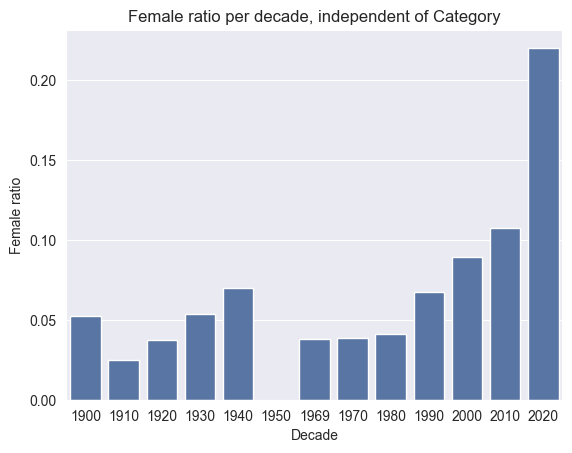

In [103]:
p2 = sns.barplot(data=nobel_year, x='decade', y='female_ratio')
p2.set(title="Female ratio per decade, independent of Category", ylabel="Female ratio", xlabel="Decade")
plt.show()

### Female ratio across categories


In [104]:
nobel_cat_gen = nobel.groupby(['sex', 'category'], observed=True).count()
nobel_cat = nobel.groupby('category', observed=True).count()
nobel_cat_gen = nobel_cat_gen.loc['Female']
nobel_cat['female_ratio'] = nobel_cat_gen['year'] / nobel_cat['year']
nobel_cat

,year,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,decade,female_ratio
category,,,,,,,,,,,,,,,,,,,
Chemistry,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,194,0.041237
Economics,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,93,0.032258
Literature,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,0.141667
Medicine,227,227,227,227,227,227,227,227,227,227,227,227,227,227,227,227,227,227,0.057269
Peace,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,141,0.134752
Physics,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,0.022222


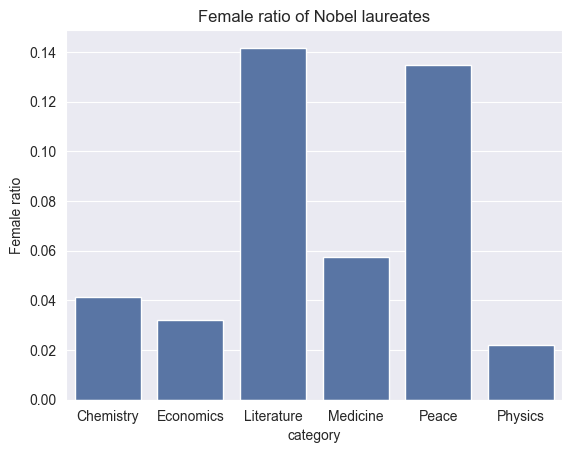

In [105]:
p = sns.barplot(data=nobel_cat, x='category', y='female_ratio')
p.set(title="Female ratio of Nobel laureates", ylabel="Female ratio")
plt.show()

### First female winner(s)

We want to find the three first women to win a Nobel Prize, and also see which category they won a prize in. Due to datacamp requirements, the first female winner will be saved in a separate dictionary. 

In [106]:
nobel.head(2)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,decade
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30 00:00:00,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,1900
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16 00:00:00,Paris,France,Male,not given,not given,not given,1907-09-07,Châtenay,France,1900


In [107]:
#The first female winner
nobel_female = nobel[nobel['sex']=='Female'].reset_index(drop=True) #subsetting the rows of female laurates
first_woman_name = nobel_female.iloc[nobel_female['year'].idxmin()]['full_name'] #this variable is a datacamp requirement
first_woman_category = nobel_female.iloc[nobel_female['year'].idxmin()]['category'] #this variable is a datacamp requirement
print(first_woman_name + ", " + first_woman_category)


Marie Curie, née Sklodowska, Physics


In [108]:
#The 3 first female winners
nobel_female = nobel_female.sort_values(by=['year'], ascending=True)

print("THE THREE FIRST FEMALE NOBEL WINNERS:\n")
for n in range(3): 
    female = nobel_female.iloc[n]
    print(female['full_name'] + " won the Nobel price for " + str(female['category']) + " in " + str(female['year']) + ".")
    if female["prize_share"]!= '1/1':
        print("She shared the prize with other laureates.\n")
    else:
        print("She won the individually (alone).\n")

THE THREE FIRST FEMALE NOBEL WINNERS:

Marie Curie, née Sklodowska won the Nobel price for Physics in 1903.
She shared the prize with other laureates.

Baroness Bertha Sophie Felicita von Suttner, née Countess Kinsky von Chinic und Tettau won the Nobel price for Peace in 1905.
She won the individually (alone).

Selma Ottilia Lovisa Lagerlöf won the Nobel price for Literature in 1909.
She won the individually (alone).



### Women and Nobel prizes - short summary of findings

We have seen that it is far more common for a woman to win a Nobel prize in literature or peace. 

We have also seen that the overall ratio of female Nobel prize winners (across categories) has been low since the start, but that the ratio has increased every decade since 1990. 

An all time minimum happened in 1950, when there were no female laurates at all in either category. 

## Individuals and/or organizations with more than one win

We want to find out if someone, individuals or organizations, has ever won a Nobel prize more than once. We will store their full names in a list. 

In [23]:
## Remaining: indoviduals and organizations with more than 1 win
duplicates = nobel["full_name"].duplicated()
duplicated_folks = nobel[duplicates].drop_duplicates('laureate_id')
repeat_list = duplicated_folks['full_name'].tolist() #This list is a datacamp requirement
repeat_list

['Marie Curie, née Sklodowska',
 'Comité international de la Croix Rouge (International Committee of the Red Cross)',
 'Linus Carl Pauling',
 'John Bardeen',
 'Frederick Sanger',
 'Office of the United Nations High Commissioner for Refugees (UNHCR)']